# Análise de Dados: Vendas de Cursos Online

Requisitos Funcionais:

> 1. **Carregamento de Dados:** Implementar a funcionalidade para carregar um conjunto de dados em formato CSV ou outro formato simples suportado pelo Python.
> 2. **Exploração de Dados:** Exibir as primeiras linhas e informações básicas do conjunto de dados, como número de linhas, colunas e tipos de dados presentes.
> 3. **Estatísticas Descritivas:** Calcular e exibir estatísticas descritivas básicas para colunas numéricas do conjunto de dados, como média, mediana, mínimo, máximo e desvio padrão.
> 4. **Visualização de Dados:** Criar pelo menos dois tipos de gráficos utilizando bibliotecas como Matplotlib ou Seaborn, como gráfico de barras para contagem de categorias e gráfico de dispersão para relação entre variáveis.

### Dicionários da base de dados

A base de dados consiste de um arquivo `CSV` contendo 5 colunas com dados ficticios de vendas de cursos online.

Descrição das colunas:

> + **ID:** Identificador único de cada curso vendido.
> + **Nome do Curso:** Nome do curso vendido na plataforma.
> + **Quantidade de Vendas:** Número de vendas realizadas para cada curso.
> + **Preço Unitário:** Preço unitário do curso.
> + **Data:** Data da venda do curso.



**Carregando as bibliotecas necessárias**

In [85]:
import numpy as np
import pandas as pd

from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%config InlineBackend.figure_format = "retina"

#### Carregando a base de dados

In [86]:
df_vendas = pd.read_csv("../data/dados_vendas_cursos_online.csv")

Visualizando as primeiras linhas do DataFrame

In [87]:
df_vendas.head()

,ID,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


#### Obtendo o detalhamento da base de dados

In [88]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null     object 
 2   Quantidade de Vendas  25 non-null     int64  
 3   Preço Unitário        25 non-null     float64
 4   Data                  25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


Verificando se existe dados faltantes na base de dados.

In [89]:
df_vendas.isnull().sum()

ID                      0
Nome do Curso           0
Quantidade de Vendas    0
Preço Unitário          0
Data                    0
dtype: int64

#### Obtendo resumo estatístico da base de dados para as columas `Quantitativas`

In [90]:
df_vendas.describe()

,ID,Quantidade de Vendas,Preço Unitário
count,25.000000,25.000000,25.000000
mean,13.000000,17.960000,83.900000
std,7.359801,10.921996,21.984843
min,1.000000,5.000000,39.900000
25%,7.000000,10.000000,69.900000
50%,13.000000,15.000000,79.900000
75%,19.000000,20.000000,99.900000
max,25.000000,50.000000,119.900000


#### Renomeando nomes da base de dados

In [91]:
df_vendas = df_vendas.rename(columns={
    "Nome do Curso": "nome_curso",
    "Quantidade de Vendas": "qt_de_vendas",
    "Preço Unitário": "preco_initario",
    "Data": "data"})

df_vendas.head()

,ID,nome_curso,qt_de_vendas,preco_initario,data
0,1,Introdução à Programação em Python,50,39.9,2023-01-01
1,2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
2,3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
3,4,Introdução ao Machine Learning,15,99.9,2023-01-04
4,5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05


#### Convertendo a coluna `data` no tipo `datetime`

In [92]:
df_vendas["data"] = pd.to_datetime(df_vendas["data"], format='%Y-%m-%d')

print(f"Tipo do dado após conversão: {df_vendas['data'].dtypes}")
print(f"Amostrar para visualização {df_vendas['data'][1]}")

Tipo do dado após conversão: datetime64[ns]
Amostrar para visualização 2023-01-02 00:00:00


## Análise Exploratória (EDA) Univariada

#### Análise das Variáveis Numéricas

##### **Histograma, resumo da Estatísticas Descritivas e análise de Assimetria da Quantidade de Vendas**

Podemos observar uma assimetria ao realizar o plot do histograma para a variável quantidade de vendas. no entanto para comprovar essa hipótese seria necessário aplicar um teste.


Para testar a assimetria (ou skewness) dos dados amostrais, você pode usar a função `skew` da biblioteca `scipy.stats` no Python. A assimetria mede a simetria dos dados em torno da média. Uma distribuição simétrica tem assimetria igual a zero. Uma assimetria positiva indica que a cauda direita é mais longa ou mais grossa que a cauda esquerda, enquanto uma assimetria negativa indica que a cauda esquerda é mais longa ou mais grossa que a cauda direita.


A assimetria (ou skewness) de um conjunto de dados é definida pelo valor da métrica de assimetria. Aqui estão os critérios gerais para interpretar o valor de assimetria:

> + Assimetria zero (skewness = 0): A distribuição é perfeitamente simétrica. Isso é típico para distribuições normais.
> + Assimetria positiva (skewness > 0): A distribuição tem uma cauda à direita mais longa ou mais grossa. Os valores médios e a mediana são menores que a moda.
> + Assimetria negativa (skewness < 0): A distribuição tem uma cauda à esquerda mais longa ou mais grossa. Os valores médios e a mediana são maiores que a moda.

Embora não haja valores de corte rígidos e rápidos, aqui estão algumas diretrizes comuns para interpretar a magnitude da assimetria:

> + `-0.5 < skewness < 0.5`: A distribuição é aproximadamente simétrica.
> + `-1 < skewness < -0.5` ou `0.5 < skewness < 1`: A distribuição é moderadamente assimétrica.
> + `skewness < -1` ou `skewness > 1`: A distribuição é altamente assimétrica.


Esses valores são diretrizes e a interpretação pode variar dependendo do contexto específico dos dados e da aplicação.



> **Ao aplicar o teste e usar como base as diretrizes propostas, podemos concluir que os dados para essa variável é altamente assimétrico positiva, uma vez que o valor foi de  `1.53`.**



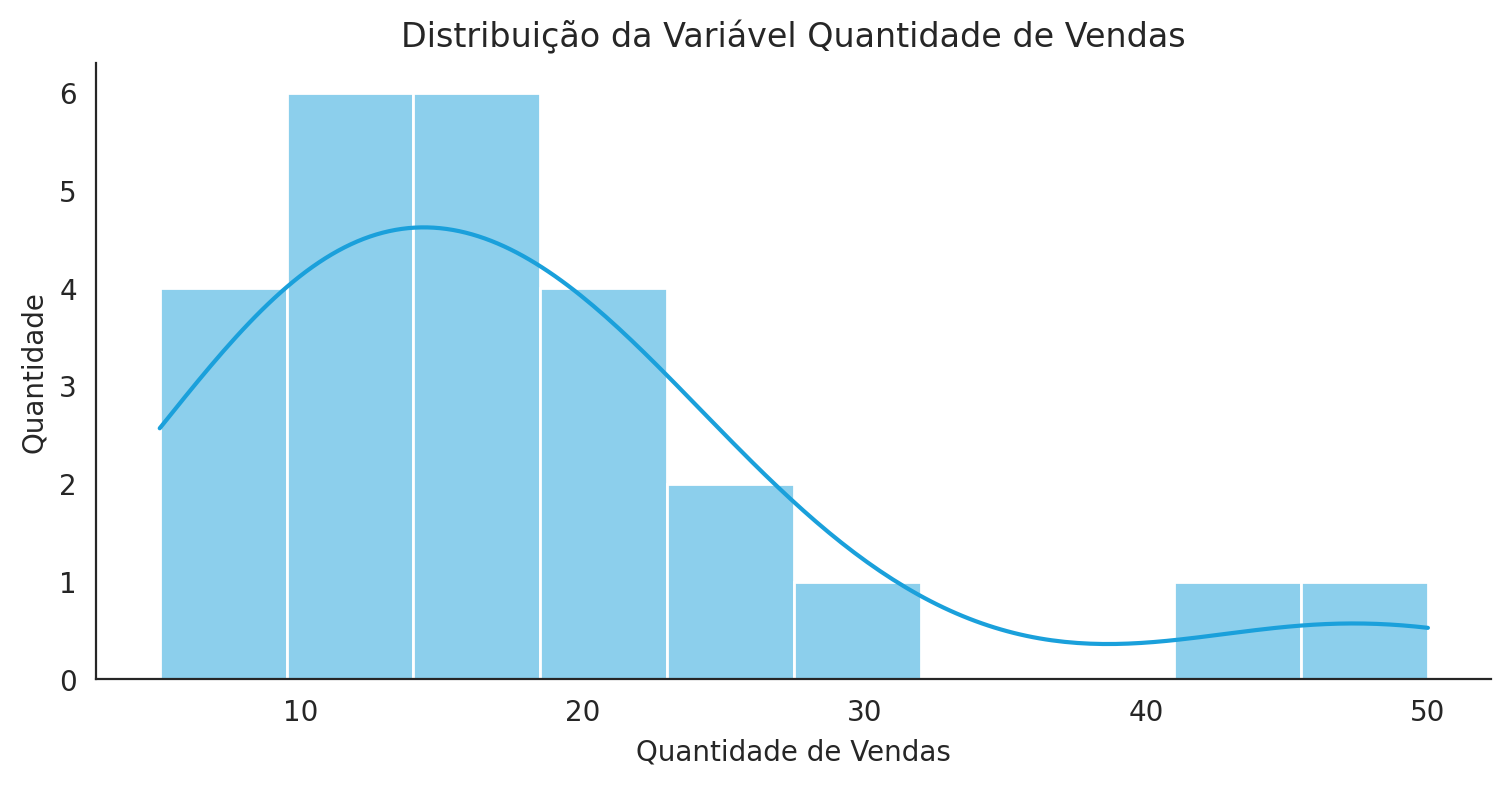

In [93]:
plt.figure(figsize=(9, 4))
cores = ["#0A66C2", "#ECF7AE", "#1AA0DB", "#8BD5DB"]
sns.set_palette(sns.color_palette(cores))
ax= sns.histplot(df_vendas["qt_de_vendas"], bins=10, kde=True, color=cores[-2])
sns.despine(right=True)

plt.title("Distribuição da Variável Quantidade de Vendas", fontsize=12)
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Quantidade")
plt.show()

In [94]:
df_vendas["qt_de_vendas"].describe()

count    25.000000
mean     17.960000
std      10.921996
min       5.000000
25%      10.000000
50%      15.000000
75%      20.000000
max      50.000000
Name: qt_de_vendas, dtype: float64

In [95]:
data_skewness = skew(df_vendas["qt_de_vendas"])
data_skewness

np.float64(1.5375471585843759)

##### **Histograma, resumo da Estatísticas Descritivas e análise de Assimetria do Preço Unitário**

Ao plotar o histograma não se observa uma assimetria bem definida na variável `Preço Unitário`. para verificar se existe ou não uma assimetria foi novamente realizado um teste em que teve como resultado `-0.283` indicando que os dados para essa variável não assimétricos, ou seja, se aproximam de uma distribuição nornal.

Além disso, foi obtido um resuno de Estatísticas Descritivas.



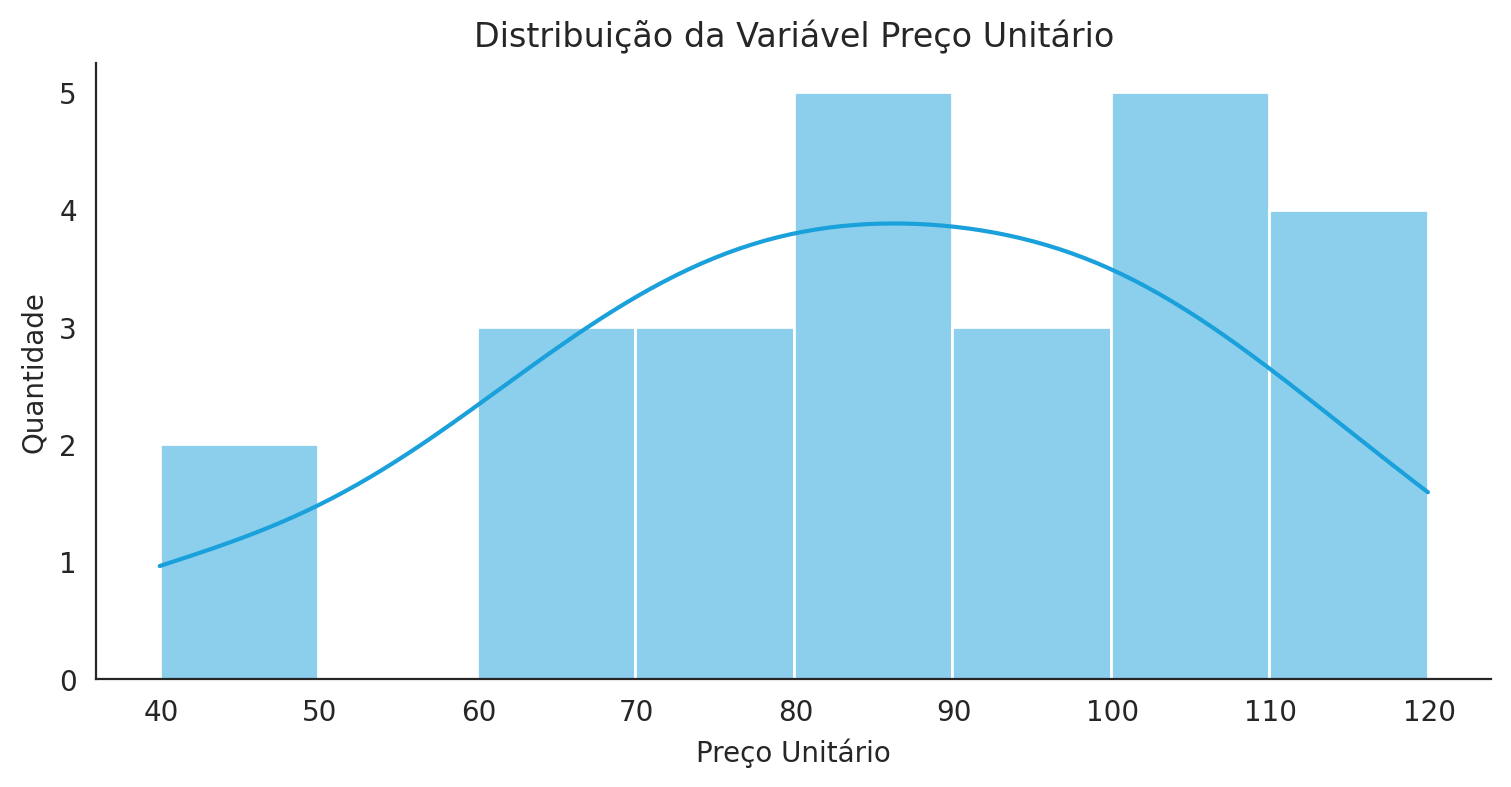

In [96]:
plt.figure(figsize=(9, 4))
sns.set_palette(sns.color_palette(cores))
ax= sns.histplot(df_vendas["preco_initario"], bins=8, kde=True, color=cores[-2])
sns.despine(right=True)

plt.title("Distribuição da Variável Preço Unitário", fontsize=12)
plt.xlabel("Preço Unitário")
plt.ylabel("Quantidade")
plt.show()

In [97]:
df_vendas["preco_initario"].describe()

count     25.000000
mean      83.900000
std       21.984843
min       39.900000
25%       69.900000
50%       79.900000
75%       99.900000
max      119.900000
Name: preco_initario, dtype: float64

In [98]:
data_skewness = skew(df_vendas["preco_initario"])
data_skewness

np.float64(-0.2833454729080899)

,nome_curso,qt_de_vendas
0,Arquitetura de Microserviços,3
1,Banco de Dados SQL e NoSQL,2
2,Cloud Computing com AWS,2
3,Desenvolvimento Mobile com React Native,3
4,Desenvolvimento Web com HTML e CSS,3
5,DevOps: Integração e Entrega Contínua,2
6,Introdução ao Machine Learning,3
7,Introdução à Programação em Python,2
8,JavaScript Avançado: Frameworks e Bibliotecas,3
9,Segurança da Informação: Fundamentos,2


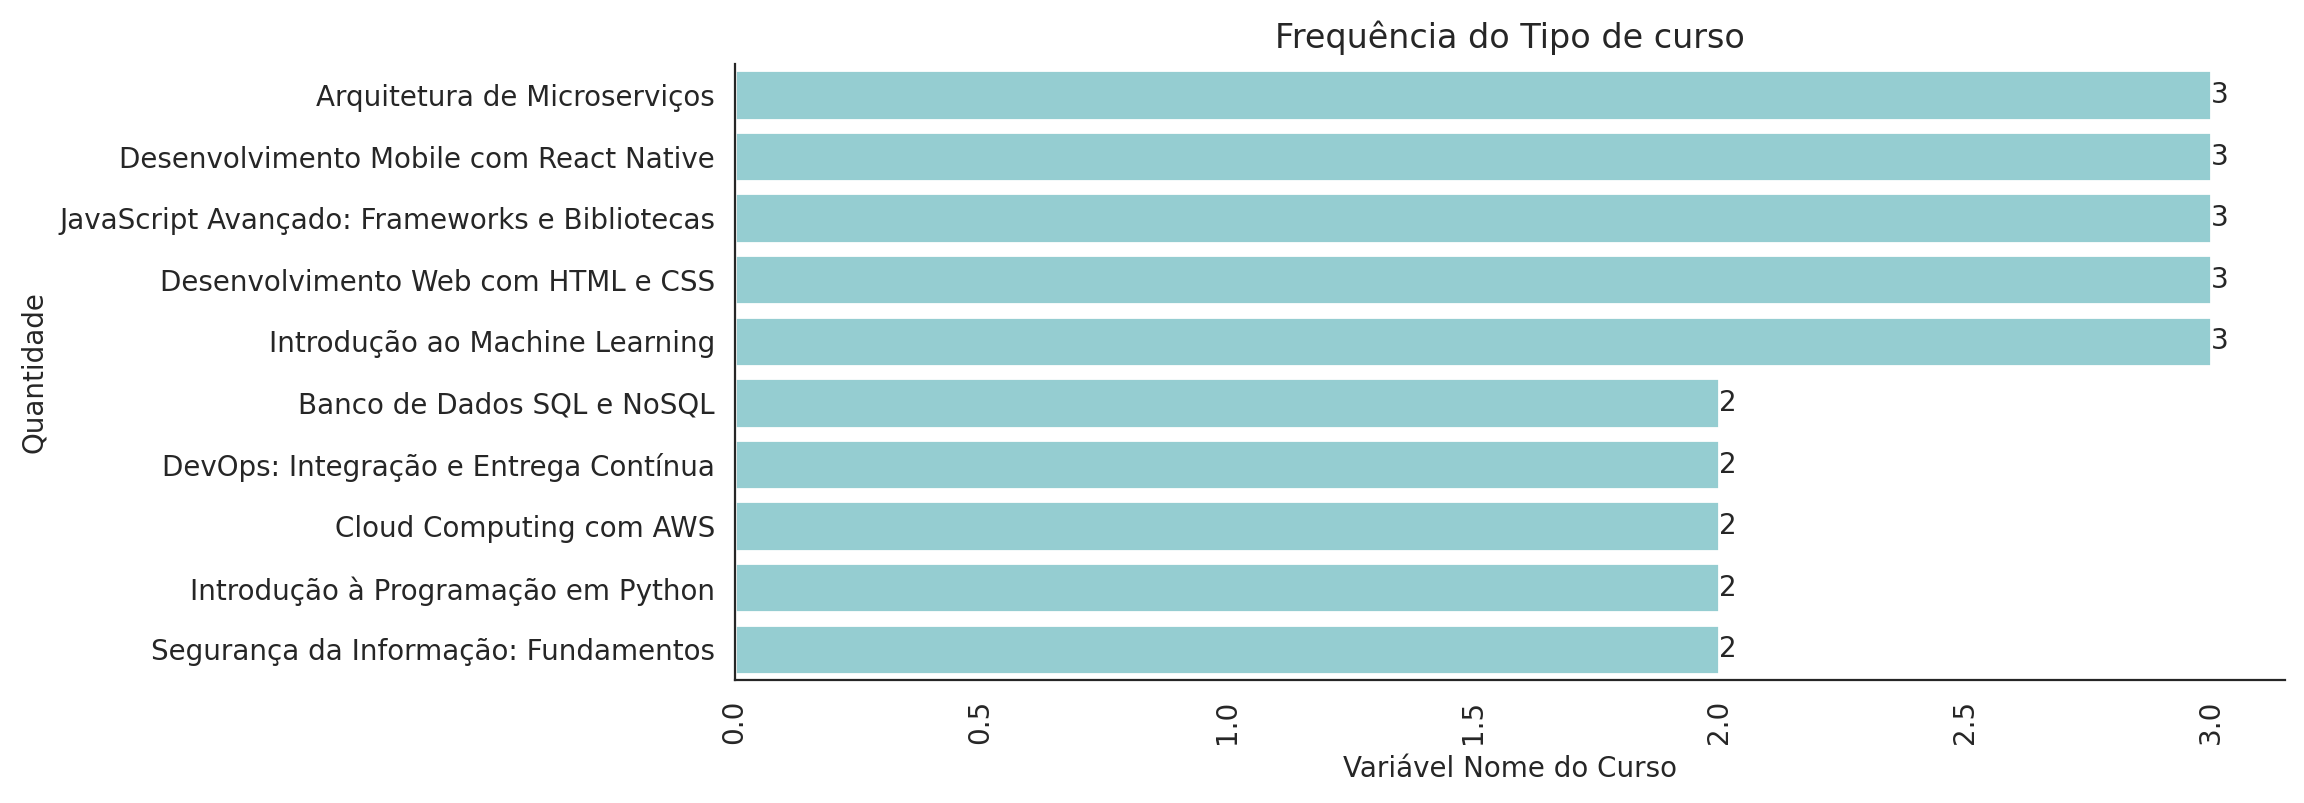

In [116]:
plt.figure(figsize=(10, 4))


data = (df_vendas
      .groupby(by="nome_curso")
      .qt_de_vendas.count()
      .sort_values(ascending=False)
      .to_frame()
      .reset_index())

ax = sns.barplot(x=data.qt_de_vendas, y=data.nome_curso,
                 orient="h", color=cores[-1])

ax.bar_label(ax.containers[0])
ax.set(xlabel="Variável Nome do Curso", ylabel="Quantidade")
plt.title("Frequência do Tipo de curso", fontsize=12)
plt.xticks(rotation=90)
sns.despine(right=True)
plt.show()